## Visualizing Tech Stocks

In this project you will analyze and visualize the top 5 highest valued technology stocks, as of the end of the first half of 2019:
* Microsoft (NASDAQ:MSFT)
* Amazon (NASDAQ:AMZN)
* Apple (NASDAQ:AAPL)
* Alphabet (NASDAQ:GOOG)
* Facebook (NASDAQ:FB).

Using Pandas, Pandas-Datarader, and Matplotlib, you will take a visual look into the similarities and differences between these stocks during the six month period from January through June 2019. In your analysis you will perform the following:
1. Visualize the stock prices using matplotlib
2. Calculate and visualize the daily simple rate of return 
3. Calculate and visualize the mean rates of return
4. Calculate and visualize the variances of the returns
5. Calculate and visualize the standard deviations of the returns
6. Write a short thesis based on the correlations between the tech stocks

### 1. Import Packages

#### Step 1: Import Data Manipulation Packages
Import the pandas and numpy module as `pd` and `np`, respectively

In [12]:
import pandas as pd
import numpy as np

#### Step 2: Import Financial Package
Import the pandas data reader module as `web`. (Ensure the module is installed with `pip install pandas-datareader` on the command line)

In [1]:
import pandas_datareader as web

#### Step 3: Import Visualization Package
Import the matplotlib `pyplot` module as `plt`. (Write `%matplotlib inline` below the import statement to allow your visualizations to appear beneath the code that generates them)

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Load the adjusted closings for the top 5 tech stocks.

#### Step 1: Define Stocks
Create a list named `symbols` containing the symbols for the top 5 tech stocks.
#### Step 2: Create Dates
Create a datetime object representing January 1st, 2019 named `start_date` and a datetime object representing July 1st, 2019 named `end_date`.
#### Step 3: Retrieve Data
Call the function `web.get_data_yahoo()` with arguments `symbols`, `start_date` and `end_date` and save the result to `stock_data`.
#### Step 4: View Data
View both `stock_data` and `stock_data['Adj Close']`. What information is stored in these DataFrames?

In [16]:
# Defining Stocks
symbols = ['MSFT', 'AMZN', 'AAPL', 'GOOG', 'FB'] 

#Creating dates
start_date ='2019-01-01'
end_date ='2019-07-1'

#Retriving data

stock_data = web.get_data_yahoo(symbols, start_date, end_date)

#Viewing data

stock_data

Attributes   Adj Close                                                    \
Symbols           MSFT         AMZN        AAPL         GOOG          FB   
Date                                                                       
2019-01-02   99.375191  1539.130005  155.214005  1045.849976  135.679993   
2019-01-03   95.719376  1500.280029  139.753540  1016.059998  131.740005   
2019-01-04  100.171211  1575.390015  145.719513  1070.709961  137.949997   
2019-01-07  100.298965  1629.510010  145.395203  1068.390015  138.050003   
2019-01-08  101.026199  1656.579956  148.166870  1076.280029  142.529999   
...                ...          ...         ...          ...         ...   
2019-06-25  132.175140  1878.270020  193.786667  1086.349976  188.839996   
2019-06-26  132.670441  1897.829956  197.978088  1079.800049  187.660004   
2019-06-27  132.888367  1904.280029  197.918640  1076.010010  189.500000   
2019-06-28  132.700180  1893.630005  196.115219  1080.910034  193.000000   
2019-07-01  134.403992  1922.189941  199.712143  1097.949951  193.000000   

Attributes       Close                                                    ...  \
Symbols           MSFT         AMZN        AAPL         GOOG          FB  ...   
Date                                                                      ...   
2019-01-02  101.120003  1539.130005  157.919998  1045.849976  135.679993  ...   
2019-01-03   97.400002  1500.280029  142.190002  1016.059998  131.740005  ...   
2019-01-04  101.930000  1575.390015  148.259995  1070.709961  137.949997  ...   
2019-01-07  102.059998  1629.510010  147.929993  1068.390015  138.050003  ...   
2019-01-08  102.800003  1656.579956  150.750000  1076.280029  142.529999  ...   
...                ...          ...         ...          ...         ...  ...   
2019-06-25  133.429993  1878.270020  195.570007  1086.349976  188.839996  ...   
2019-06-26  133.929993  1897.829956  199.800003  1079.800049  187.660004  ...   
2019-06-27  134.149994  1904.280029  199.740005  1076.010010  189.500000  ...   
2019-06-28  133.960007  1893.630005  197.919998  1080.910034  193.000000  ...   
2019-07-01  135.679993  1922.189941  201.550003  1097.949951  193.000000  ...   

Attributes        Open                                                    \
Symbols           MSFT         AMZN        AAPL         GOOG          FB   
Date                                                                       
2019-01-02   99.550003  1465.199951  154.889999  1016.570007  128.990005   
2019-01-03  100.099998  1520.010010  143.979996  1041.000000  134.690002   
2019-01-04   99.720001  1530.000000  144.529999  1032.589966  134.009995   
2019-01-07  101.639999  1602.310059  148.699997  1071.500000  137.559998   
2019-01-08  103.040001  1664.689941  149.559998  1076.109985  139.889999   
...                ...          ...         ...          ...         ...   
2019-06-25  137.250000  1911.839966  198.429993  1112.660034  192.880005   
2019-06-26  134.350006  1892.479980  197.770004  1086.500000  189.539993   
2019-06-27  134.139999  1902.000000  200.289993  1084.000000  189.880005   
2019-06-28  134.570007  1909.099976  198.679993  1076.390015  190.550003   
2019-07-01  136.630005  1922.979980  203.169998  1098.000000  195.210007   

Attributes      Volume                                                
Symbols           MSFT       AMZN        AAPL       GOOG          FB  
Date                                                                  
2019-01-02  35329300.0  7983100.0  37039700.0  1532600.0  28146200.0  
2019-01-03  42579100.0  6975600.0  91312200.0  1841100.0  22717900.0  
2019-01-04  44060600.0  9182600.0  58607100.0  2093900.0  29002100.0  
2019-01-07  35656100.0  7993200.0  54777800.0  1981900.0  20089300.0  
2019-01-08  31514400.0  8881400.0  41025300.0  1764900.0  26263800.0  
...                ...        ...         ...        ...         ...  
2019-06-25  33327400.0  3012300.0  21070300.0  1546900.0  16750300.0  
2019-06-26  23657700.0  2

In [8]:
stock_data['Adj Close']

Symbols,MSFT,AMZN,AAPL,GOOG,FB
Date,,,,,
2019-01-02,99.375191,1539.130005,155.214005,1045.849976,135.679993
2019-01-03,95.719376,1500.280029,139.753540,1016.059998,131.740005
2019-01-04,100.171211,1575.390015,145.719513,1070.709961,137.949997
2019-01-07,100.298965,1629.510010,145.395203,1068.390015,138.050003
2019-01-08,101.026199,1656.579956,148.166870,1076.280029,142.529999
...,...,...,...,...,...
2019-06-25,132.175140,1878.270020,193.786667,1086.349976,188.839996
2019-06-26,132.670441,1897.829956,197.978088,1079.800049,187.660004
2019-06-27,132.888367,1904.280029,197.918640,1076.010010,189.500000


### 3. Plot the adjusted closing prices over time.

Create a plot with matplotlib that shows the adjusted closing prices of each stock over time. Set the x label to `"Date"`. Set the y label to `"Adjusted Closing Price Over Time"`. Set the graph title to `"Tech Stocks Adjusted Price"`.

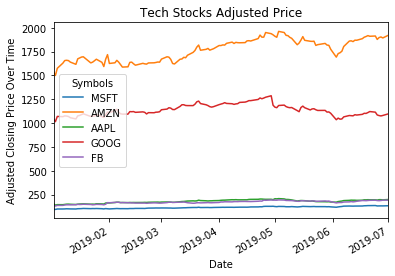

In [17]:

adj_date = stock_data["Adj Close"]
adj_date.plot()
plt.title("Tech Stocks Adjusted Price")
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price Over Time")
plt.show()

### 4. Calculate and plot the daily simple rate of return over time.
Create a plot with matplotlib that shows the daily simple rate of return for each tech stock over time. Label the graph appropriately. 

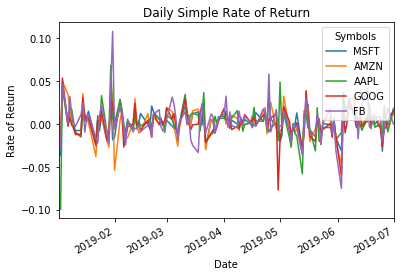

In [18]:
daily_return = adj_date.pct_change()

daily_return.plot()
plt.title("Daily Simple Rate of Return")
plt.xlabel("Date")
plt.ylabel("Rate of Return")
plt.show()

In [19]:
print(daily_return.head())

Symbols         MSFT      AMZN      AAPL      GOOG        FB
Date                                                        
2019-01-02       NaN       NaN       NaN       NaN       NaN
2019-01-03 -0.036788 -0.025242 -0.099607 -0.028484 -0.029039
2019-01-04  0.046509  0.050064  0.042689  0.053786  0.047138
2019-01-07  0.001275  0.034353 -0.002226 -0.002167  0.000725
2019-01-08  0.007251  0.016612  0.019063  0.007385  0.032452


### 5. Create subplots of daily simple rate of return.
In order to better visualize the daily returns, create a subplot for each tech stock. 

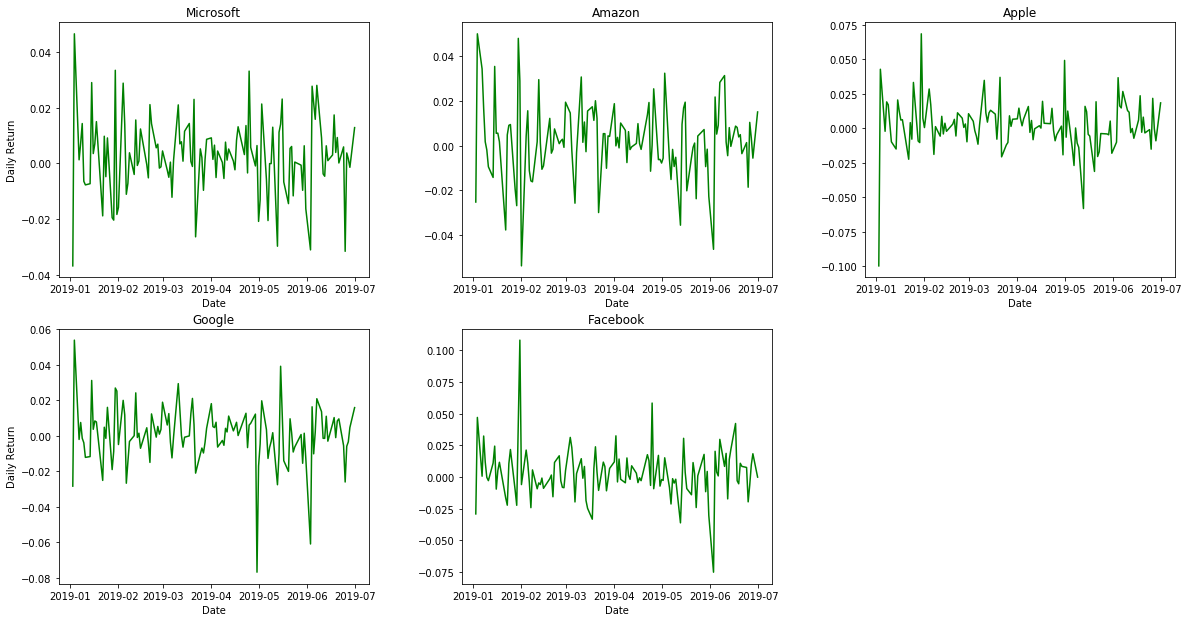

In [54]:
fig = plt.figure(figsize=(20, 10))


#Microsoft
ax1 = plt.subplot(2, 3, 1)
plt.plot(daily_return['MSFT'], color='green')
plt.title('Microsoft')
plt.xlabel('Date')
plt.ylabel('Daily Return')

#Amazon
ax2 = plt.subplot(2, 3, 2)
plt.plot(daily_return['AMZN'], color='green')
plt.title('Amazon')
plt.xlabel('Date')


#Apple
ax3 = plt.subplot(2, 3, 3)
plt.plot(daily_return['AAPL'], color='green')
plt.title('Apple')
plt.xlabel('Date')


#Google
ax4 = plt.subplot(2, 3, 4)
plt.plot(daily_return['GOOG'], color='green')
plt.title('Google')
plt.xlabel('Date')
plt.ylabel('Daily Return')

#Facebook
ax5 = plt.subplot(2, 3, 5)
plt.plot(daily_return['FB'], color='green')
plt.title('Facebook')
plt.xlabel('Date')


plt.subplots_adjust(wspace=0.3, bottom=0.1)

plt.show()

### 6. Calculate and plot the mean of each tech stock's daily simple rate of return

#### Step 1: Calculate mean rate of return
For each stock, calculate the mean daily simple rate of return.
#### Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the mean daily simple rate of return for each stock. Label the chart appropriately
#### Step 3: Analyze mean rate of return
Based on the mean rate of return, which stock would be the best option to invest in?

In [48]:
#Calculating the mean rate of return

mean_daily_return = daily_return.mean()
print(mean_daily_return)

Symbols
MSFT    0.002532
AMZN    0.001933
AAPL    0.002208
GOOG    0.000522
FB      0.003046
dtype: float64


Facebook has the highest mean simple rate of return over the period of data collected. Thus Facebook would have been a good choice for investment over this period of time. Google, on the other hand, has the lowest mean simple rate of return over the period.

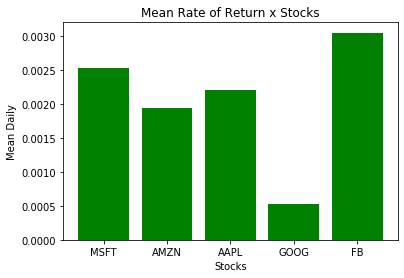

In [58]:
#Plotting bar chart

ax7 = plt.subplot()
ax7.set_xticks(range(len(symbols)))
ax7.set_xticklabels(symbols)

plt.bar(range(len(symbols)), mean_daily_return, color = 'green')

plt.xlabel('Stocks')
plt.ylabel('Mean Daily')
plt.title('Mean Rate of Return x Stocks')

plt.show()

In [ ]:
# Based only on the rate of the mean daily rate of return of stocks, the Facebook stock has the highest mean return rate. 
#Therefore, it is the best option to invest.

### 7. Calculate and plot the variance.

#### Step 1: Calculate the variance
For each stock, calculate the variance of the mean daily simple rate of return.
#### Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the variance for each stock. Label the chart appropriately
#### Step 3: Analyse the variance
Based on the variance, which stock would be the riskiest to invest in?

In [60]:
#Calculating the variance

variance_daily_return = daily_return.var()
print(variance_daily_return)

Symbols
MSFT    0.000191
AMZN    0.000280
AAPL    0.000345
GOOG    0.000258
FB      0.000408
dtype: float64


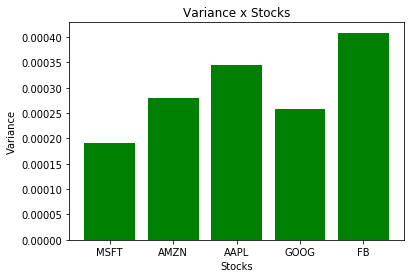

In [61]:
#Plotting bar chart
ax8 = plt.subplot()
ax8.set_xticks(range(len(symbols)))
ax8.set_xticklabels(symbols)

plt.bar(range(len(symbols)), variance_daily_return, color = 'green')

plt.xlabel('Stocks')
plt.ylabel('Variance')
plt.title('Variance x Stocks')

plt.show()


In [ ]:
#Analyzing the variance

#Considering the stocks are being analyzed individually, Facebook is the riskiest one  due to its highest variance.

Facebook shows the highest variance of all the stocks, indicating it can be a riskier investment. Google shows the lowest variance, indicating that the returns are more predictable. This goes along with the typical understanding of higher return, high risks stocks, and lower return, low risk stocks.

### 8. Calculate and plot the standard deviation

#### Step 1: Calculate the standard deviation
For each stock, calculate the standard deviation of the mean daily simple rate of return.

#### Step 2: Plot the bar chart
Use matplotlib to create a bar chart comparing the standard deviation of the mean daily simple rate of return of each stock. Label the chart appropriately

#### Step 3: Analyze the standard deviation
Based on the standard deviation of the rates of return, which stock would you choose to invest in and why?

In [62]:
#Calculating Standard Deviation

sd_daily_return = daily_return.std()
print(sd_daily_return)

Symbols
MSFT    0.013802
AMZN    0.016742
AAPL    0.018576
GOOG    0.016068
FB      0.020209
dtype: float64


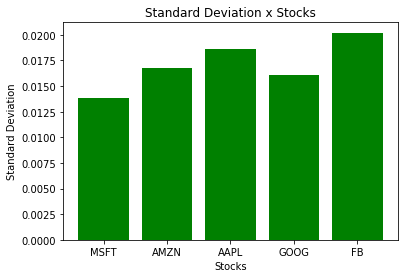

In [63]:
#Plotting bar chart
ax9 = plt.subplot()
ax9.set_xticks(range(len(symbols)))
ax9.set_xticklabels(symbols)

plt.bar(range(len(symbols)), sd_daily_return, color = 'green')

plt.xlabel('Stocks')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation x Stocks')

plt.show()


In [ ]:
#Analyzing the Standard Deviation

#I would choose a stock to invest according to my investor profile. If I'd rather take more risk, I would invest in Facebook sotcks.
# because it brings more return.
#On the other hand, if I was risk-averse, I would invest in Microsoft stocks because brings a good return with less risk.

The answer to this question depends on your investment preferences. Facebook is the most volatile stock, as it has the largest standard deviation. It also, however, has the largest mean return. If you are a more risky investor, this could be your stock of choice. Google, on the other hand, is the least volatile stock, but has the lowest mean return.

### 9. Calculate the correlations
Calculate the correlations between each of the stocks. Which stocks are positively correlated? Which are negatively correlated? Which have little correlation?

In [65]:
#Calculating Correlation

correlation= daily_return.corr()
print(correlation)

Symbols      MSFT      AMZN      AAPL      GOOG        FB
Symbols                                                  
MSFT     1.000000  0.731493  0.652943  0.636987  0.454094
AMZN     0.731493  1.000000  0.610110  0.721504  0.572073
AAPL     0.652943  0.610110  1.000000  0.569773  0.438760
GOOG     0.636987  0.721504  0.569773  1.000000  0.633440
FB       0.454094  0.572073  0.438760  0.633440  1.000000


None of the stocks are negatively correlated. Microsoft and Google are highly correlated, while Facebook and Apple exhibit the lowest correlation.